In [1]:
# Import libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json
import scipy
import numpy as np
from sklearn import preprocessing
import math

In [2]:
# Specify relative path
url = '/Users/mac/Downloads/yelp_dataset/'

# Convert JSON to pandas DataFrame
data = pd.read_json(url + 'business.json', lines=True)

# Filter data by business of interest: Restaurants 
    # restaurants_filter = data[data['categories'].str.contains("Restaurants") == True]

# Display First 5 instances of the data
data.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [3]:
# Get descriptive stats of the data
description = data.describe()

,is_open,latitude,longitude,review_count,stars
count,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000
mean,0.823040,38.541803,-97.594785,33.538962,3.585627
std,0.381635,4.941964,16.697725,110.135224,1.018458
min,0.000000,33.204642,-115.493471,3.000000,1.000000
25%,1.000000,33.637408,-112.274677,4.000000,3.000000
50%,1.000000,36.144815,-111.759323,9.000000,3.500000
75%,1.000000,43.602989,-79.983614,25.000000,4.500000
max,1.000000,51.299943,-72.911982,8348.000000,5.000000


In [4]:
# Check for missing values
miss_values = data.isna().sum()

# Display missing values per column 
miss_values
# For general purpose analysis, the columns that contains missing values doesn't need to have your rows excluded
# Futher analysis however can filter those values if necessary

address             0
attributes      28836
business_id         0
categories        482
city                0
hours           44830
is_open             0
latitude            0
longitude           0
name                0
postal_code         0
review_count        0
stars               0
state               0
dtype: int64

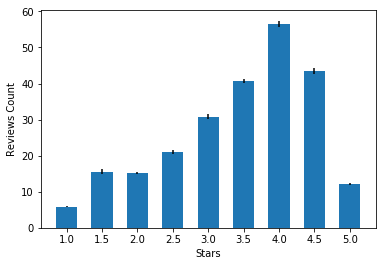

In [5]:
# Check the sparsity between reviews count and stars
    # Get the average reviews count per stars category
stars_group = data.groupby('stars').mean().reset_index() 

    # Get the SEM of reviews count per stars category
sem_stars_group = data.groupby('stars').sem().reset_index()

    # Plot error bar chart of the distribution of reviews count per star category
plt.bar(stars_group['stars'],
        stars_group['review_count'],
        yerr=sem_stars_group['review_count'],
        width=0.3,
        )
plt.xticks(stars_group['stars'])
plt.ylabel("Reviews Count")
plt.xlabel("Stars")
plt.show()

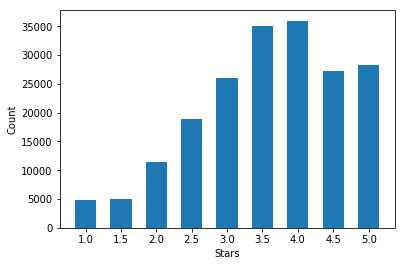

In [6]:
# Check for the distribution of observations by stars
count_stars = data.groupby('stars').count().reset_index()

plt.bar(stars_group['stars'],
        count_stars['review_count'],
        width=0.3,
        )
plt.xticks(stars_group['stars'])
plt.ylabel("Count")
plt.xlabel("Stars")
plt.show()

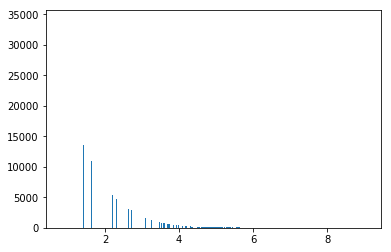

In [65]:
# Create a Key Performance Indicator for the "success" of a business in yelp
    # Slicing stars and reviews count
stars_df = data['stars']
lb = 1
log_reviews_count_array = np.log(data['review_count']*\
                                 data['review_count']/\
                                 (data['review_count']+lb))
# # log_reviews_count_array
#     # Normalize reviews_array
norm_reviews_count = preprocessing.normalize([log_reviews_count_array])
norm_reviews_count = norm_reviews_count[0]
plt.hist(norm_reviews_count, bins=1000)
plt.show()

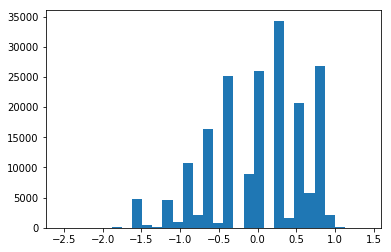

In [12]:
# Create column of KPI

score = []

for review in data['review_count']:
    # Until mean receive score 0.6
    if review <= 34:
        score.append(0.6)
    # Until mean + std dev receive score 0.7
    elif review <= 144:
        score.append(0.7)
    # Until mean + 2*std dev receive score 0.8
    elif review <= 254:
        score.append(0.8)
    # Until mean + 3*std dev receive score 0.9
    elif review <= 364:
        score.append(0.9)
    # Above mean + 3*std dev receive score 1.0
    else:
        score.append(1.0)

# Standardize stars column
    # Create the Scaler object
scaler = preprocessing.StandardScaler()

    # Apply scaler to stars column
standard_stars = scaler.fit_transform(np.array(data['stars']).reshape(-1, 1))

    # Insert standardized column to dataframe
data['Standardized Stars'] = standard_stars


# Insert KPI column to dataframe
data['KPI'] = data['Standardized Stars']*score

# Plot distribution density of the KPI
plt.hist(data['KPI'], bins=30)
plt.show()

In [13]:
# Descriptive statistics about the KPI
data['KPI'].describe()

count    192609.000000
mean          0.003623
std           0.614873
min          -2.538772
25%          -0.345009
50%          -0.050445
75%           0.538682
max           1.388743
Name: KPI, dtype: float64

In [64]:
# Export modified data to csv file
data.to_csv("yelp_business.csv")